## 練習時間
透過 Kaggle 的實戰練習，把資料下載下來，自己做訓練集/測試集的切分，送進模型訓練，評估結果，再把測試集的答案上傳到 Kaggle 得到最終成績。

# [作業目標]
- 請完成 scikit-learn-practice 比賽(點擊連結可至競賽頁面)，讓大家熟悉 Scikit-learn 的比賽
- 請在 private / public leaderboard 上取得 0.7 以上的準確率 (Hint : 使用 pandas.DataFreame.to_csv)

# [作業重點]
- 執行後, 將所得結果, 存成可以提交的 csv 檔

# [提醒]
- 執行後, 將所得結果, 存成可以提交的 csv 檔 (In[10]) (Hint : 使用 pandas.DataFreame.to_csv)

In [1]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### 讀取檔案

In [2]:
# 設定 data_path
dir_data = '../data/data-science-london-scikit-learn/'
f_train = os.path.join(dir_data, 'train.csv')
f_test = os.path.join(dir_data, 'test.csv')
f_trainLabels = os.path.join(dir_data, 'trainLabels.csv')

# 讀取檔案
app_train = pd.read_csv(f_train, header=None)
app_test = pd.read_csv(f_test, header=None)
train_labels = pd.read_csv(f_trainLabels, header=None)

# 40種類別
col = []
for i in range(40):
    col.append('Class_' + str(i))

app_train.columns = col
app_test.columns = col
app_train.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,...,Class_30,Class_31,Class_32,Class_33,Class_34,Class_35,Class_36,Class_37,Class_38,Class_39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


# 原來特徵 + 隨機森林
### 做好前處理

In [3]:
# 標準化
scaler = StandardScaler()

# 對 train, test 進行標準化
train = scaler.fit_transform(app_train)
test = scaler.fit_transform(app_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1000, 40)
Testing data shape:  (9000, 40)


### Fit the model

In [4]:
# 原來特徵 + 隨機森林
# 切分訓練集/測試集
X_train, X_test, Y_train, Y_test = train_test_split(train, train_labels, test_size = 0.25, random_state = 0)

# 建立模型
clf = RandomForestClassifier(random_state=7)

# 先看看使用預設參數得到的結果
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

### 原來特徵 + 隨機森林預測結果

In [5]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.864


# 高重要性特徵 + 隨機森林

### 特徵重要性

In [6]:
feats = pd.Series(data=clf.feature_importances_, index=app_train.columns)
feats = feats.sort_values(ascending=False)
print("Feature importance:")
print(feats)

Feature importance:
Class_14    0.113512
Class_12    0.087228
Class_36    0.056577
Class_18    0.053863
Class_39    0.048119
Class_6     0.046328
Class_32    0.040299
Class_34    0.039314
Class_29    0.037878
Class_4     0.037575
Class_28    0.037401
Class_23    0.031026
Class_22    0.026020
Class_7     0.022758
Class_38    0.016744
Class_33    0.014617
Class_10    0.014271
Class_35    0.013720
Class_0     0.013506
Class_3     0.013490
Class_2     0.013251
Class_13    0.013160
Class_25    0.013040
Class_21    0.012993
Class_1     0.012953
Class_19    0.012908
Class_15    0.012687
Class_20    0.012621
Class_24    0.012505
Class_37    0.012199
Class_26    0.012071
Class_9     0.011985
Class_27    0.011950
Class_30    0.011566
Class_11    0.011469
Class_16    0.010757
Class_31    0.010301
Class_5     0.010300
Class_17    0.008911
Class_8     0.008128
dtype: float64


### 做好前處理

In [7]:
# 高重要性特徵 + 隨機森林
high_feature = list(feats[:15].index)

# 標準化 
scaler = StandardScaler()

# 對 train, test 進行標準化
train = scaler.fit_transform(app_train[high_feature])
test = scaler.fit_transform(app_test[high_feature])
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1000, 15)
Testing data shape:  (9000, 15)


### Fit the model

In [8]:
# 切分訓練集/測試集
X_train, X_test, Y_train, Y_test = train_test_split(train, train_labels, test_size = 0.25, random_state = 0)

# 建立模型
clf = RandomForestClassifier(random_state=7)

# 先看看使用高重要性特徵得到的結果
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

### 高重要性特徵 + 隨機森林預測結果

In [9]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9


# 高重要性特徵 +超參數組合+隨機森林
### 做好前處理

In [10]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.25, random_state = 0)

# 設定要訓練的超參數組合
n_estimators = np.arange(430,500,10)
max_depth = [11,12,13,14,15]
max_features = ['sqrt'] 
#max_features = [None, 'sqrt', 'log2'] 

hyperparameters = {
    'n_estimators': n_estimators,
    'max_depth' : max_depth,   
    'max_features' : max_features
}

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid=hyperparameters, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 5-fold cross-validadtion，總共 35 種參數組合，總共要 train 175 次模型

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.9min finished


In [11]:
# 印出超參數組合訓練的最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.900000 using {'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 450}


### Fit the model

In [12]:
# 使用最佳參數重新建立模型
clf_bestparam = RandomForestClassifier(max_depth=grid_result.best_params_['max_depth'],
                                        n_estimators=grid_result.best_params_['n_estimators'],
                                       max_features=grid_result.best_params_['max_features'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

### 高重要性特徵 +超參數組合+隨機森林預測結果

In [13]:
print(metrics.accuracy_score(y_test, y_pred))

0.9


### 儲存預測結果

In [14]:
col = ['Id','Solution']
submit = pd.DataFrame(np.transpose([np.arange(1,len(y_pred)+1), y_pred]), columns=col)

In [15]:
submit.to_csv("RFC_baseline.csv", index=False)

### kaggle上傳結果

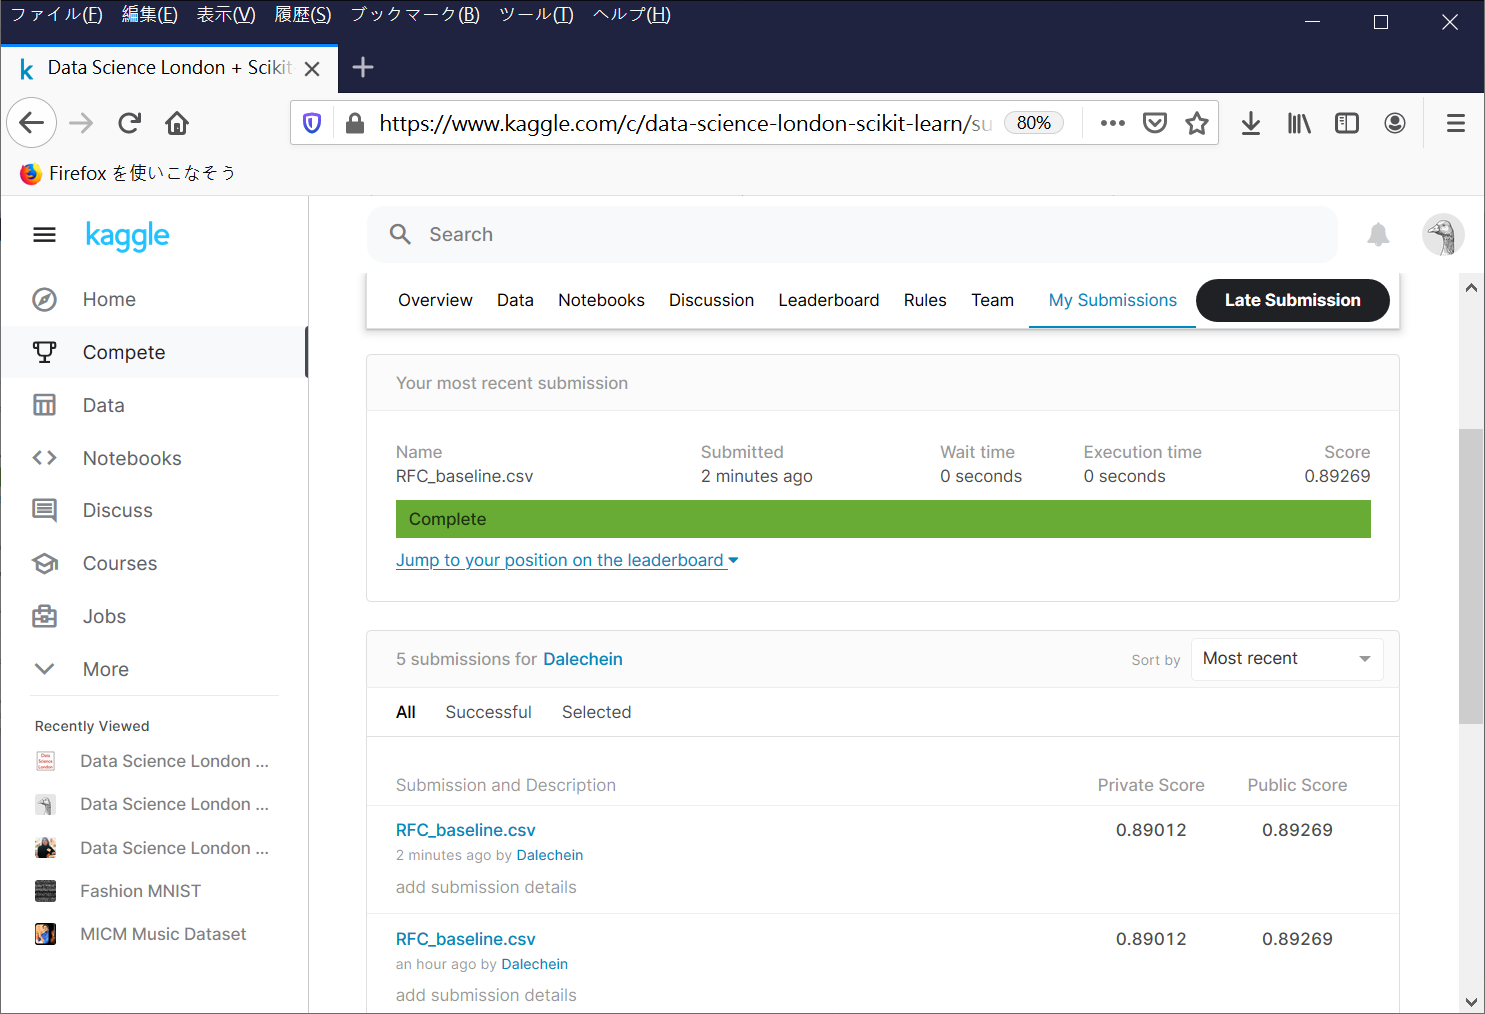

In [16]:
from IPython.display import Image
Image(filename='result.png')